In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [93]:
df = pd.read_csv('E:\hocmaycoban\BTL\BTL_HocMay\dataset\Employment_Unemployment_GDP_data.csv')

output_path = r"E:\hocmaycoban\BTL\BTL_HocMay\output\figure"
os.makedirs(output_path, exist_ok=True)

print(df.head())

print("✅ Kích thước dữ liệu:", df.shape)
print("✅ Các cột dữ liệu:\n", df.columns.tolist())

# Thông tin và mô tả dữ liệu
print(df.info())
print(df.describe())

df.rename(columns={
    'Country Name': 'Country',
    'Employment Sector: Agriculture': 'Labor_Agriculture',
    'Employment Sector: Industry': 'Labor_Industry',
    'Employment Sector: Services': 'Labor_Services',
    'Unemployment Rate': 'Unemployment_Rate',
    'GDP (in USD)': 'GDP'
}, inplace=True)

print("✅ Cột sau khi đổi:", df.columns.tolist())
print(df.info())
print(df.describe())

print("\n🔹 Dataset info:")
print(df.info())


print("\n🔹 Missing values:")
print(df.isnull().sum())


  Country Name  Year  Employment Sector: Agriculture  \
0      Albania  1991                              53   
1      Algeria  1991                              24   
2       Angola  1991                              40   
3    Argentina  1991                              14   
4      Armenia  1991                              54   

   Employment Sector: Industry  Employment Sector: Services  \
0                           12                           35   
1                           25                           51   
2                            8                           52   
3                           29                           58   
4                           16                           30   

   Unemployment Rate    GDP (in USD)  
0                 10   1,099,559,028  
1                 21  45,715,676,428  
2                 17  10,603,784,541  
3                  5 189,719,984,268  
4                  2   2,069,870,130  
✅ Kích thước dữ liệu: (5751, 7)
✅ Các cột dữ liệu:

In [94]:
# 3.2.1. Xử lý giá trị thiếu
df.fillna(df.mean(numeric_only=True), inplace=True)
print("\n✅ Đã xử lý giá trị thiếu.")


✅ Đã xử lý giá trị thiếu.


In [95]:
# 3.2.2. Xóa outlier (sử dụng IQR)
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("✅ Dữ liệu sau khi loại bỏ outlier:", df.shape)



✅ Dữ liệu sau khi loại bỏ outlier: (4671, 7)


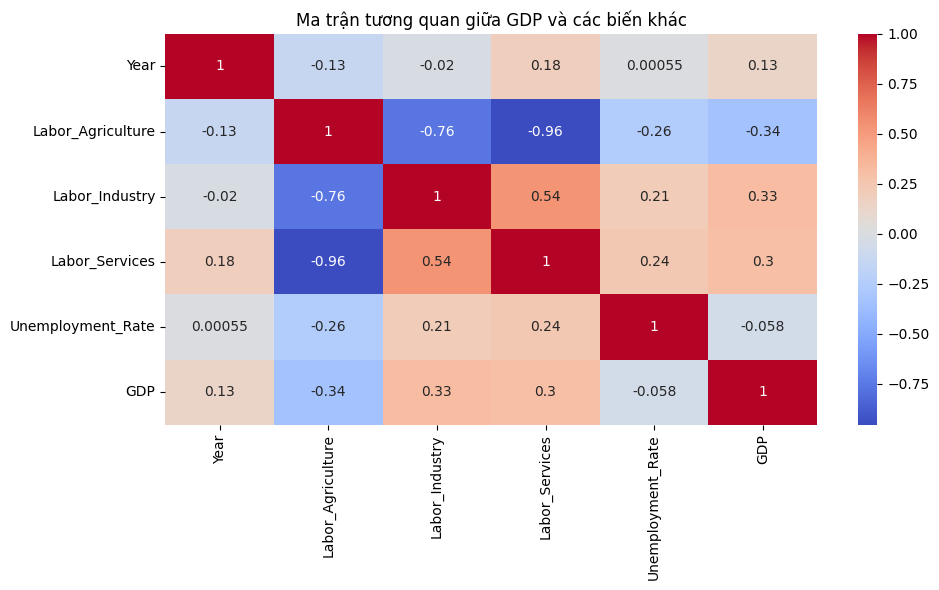

In [96]:
# 3.2.3. Ma trận tương quan
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan giữa GDP và các biến khác")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "heatmap_correlation.png"))
plt.show()
plt.close()


In [97]:
print(df.columns.tolist())

['Country', 'Year', 'Labor_Agriculture', 'Labor_Industry', 'Labor_Services', 'Unemployment_Rate', 'GDP']


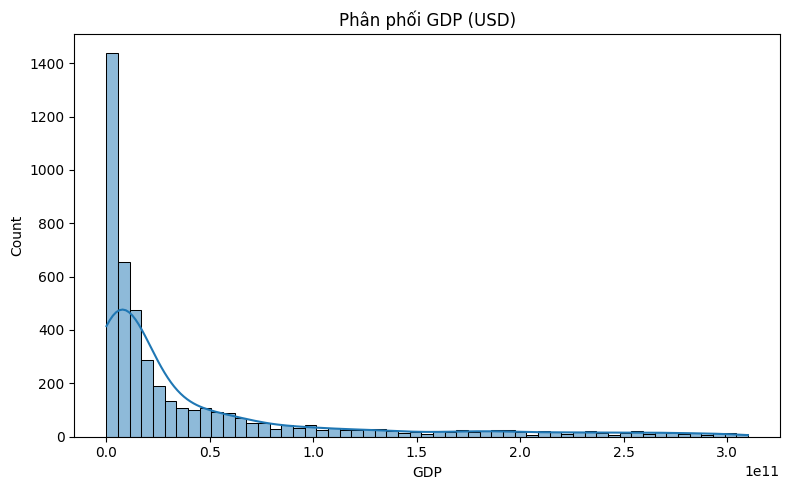

In [98]:
plt.figure(figsize=(8,5))
sns.histplot(df['GDP'], kde=True)
plt.title("Phân phối GDP (USD)")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "gdp_distribution.png"))
plt.show()
plt.close()

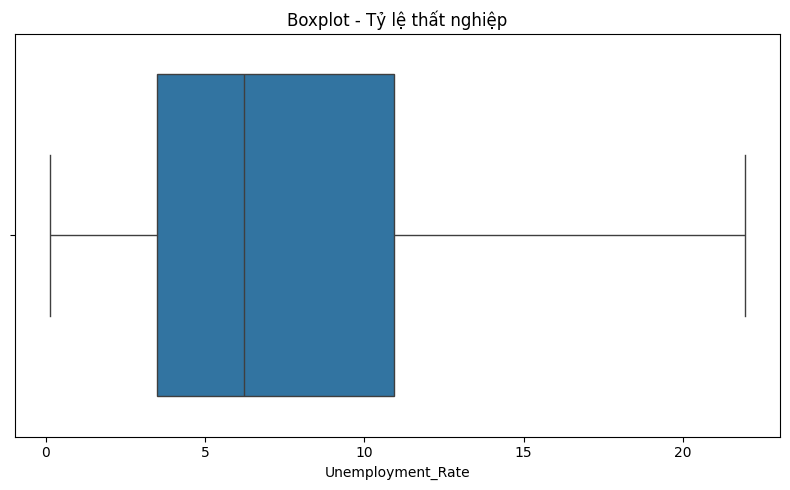

In [99]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Unemployment_Rate'])
plt.title("Boxplot - Tỷ lệ thất nghiệp")
plt.tight_layout()
plt.savefig(os.path.join(output_path, "unemployment_boxplot.png"))
plt.show()
plt.close()

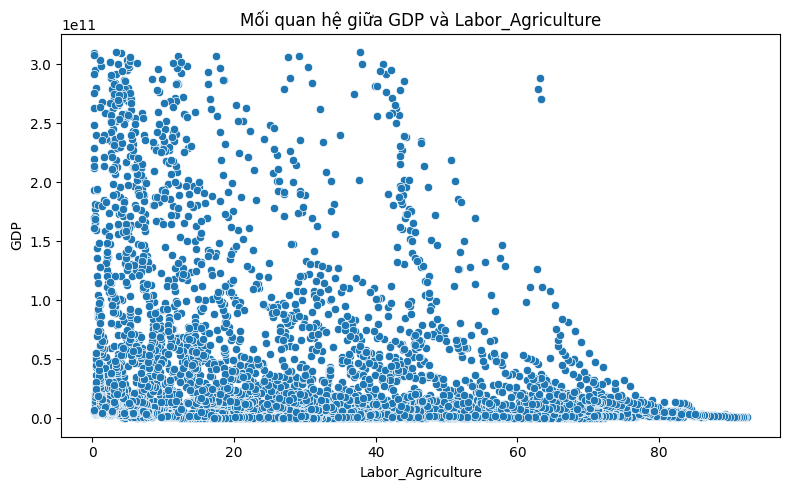

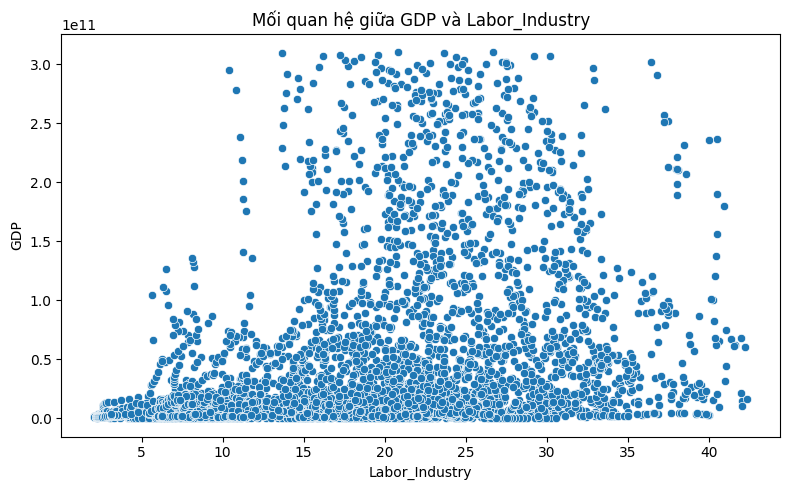

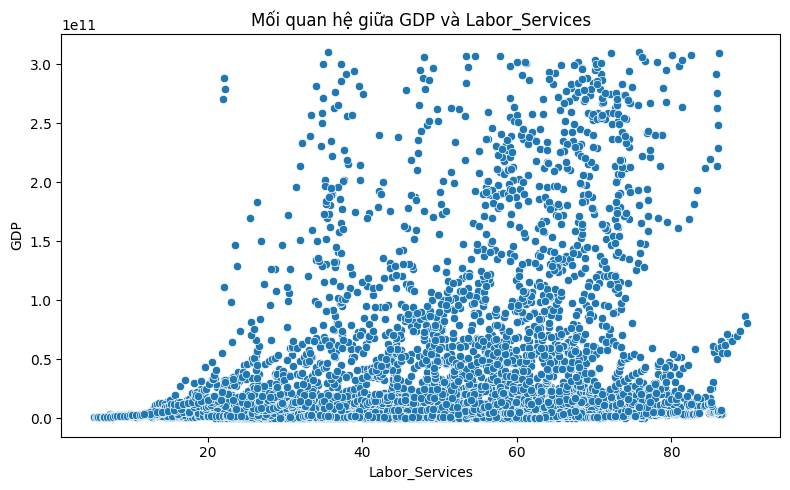

In [100]:
for col in ['Labor_Agriculture', 'Labor_Industry', 'Labor_Services']:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[col], y=df['GDP'])
    plt.title(f"Mối quan hệ giữa GDP và {col}")
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"scatter_{col}.png"))
    plt.show()
    plt.close()


In [ ]:
# 3.4.1. Loại bỏ cột không dùng
df.drop(columns=['Country', 'Year'], inplace=True, errors='ignore')

In [104]:
# 3.4.2. Chuẩn hóa dữ liệu
X = df.drop(columns=['GDP'])
y = df['GDP']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
# 3.4.3. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("✅ Đã chia dữ liệu train/test.")

✅ Đã chia dữ liệu train/test.


In [ ]:
def evaluate_model(name, model, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n📊 {name} results:")
    print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R2: {r2:.3f}")
    return {"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2}